# Preprocessing Phase #1 -  Split and Save training and test data to a directory

### CTCB (Classification of Toxigenic CyanoBacterial genera) project

* **Author : Iman Kianian**
* **Paper Link : **

---------------

#### Import the necessary libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
from PIL import Image
import uuid

-----------------

# Load Dataset

In [7]:
Categories = list(os.listdir("../org_dataset"))
Categories

['Anabaena',
 'Aphanizomenon',
 'Cylindrospermopsis',
 'Dolichospermum',
 'Microcystis',
 'Nostoc',
 'Oscillatoria',
 'Phormidium',
 'Planktothrix',
 'Raphidiopsis']

In [8]:
print(f'There are {len(Categories)} categories of oxigenic cyanobacterial genera.')

There are 10 categories of oxigenic cyanobacterial genera.


In [9]:
images = {}
images_directory = {}
for cls in Categories:
    directory = "../org_dataset/"+cls
    if os.path.isdir(directory):
        imags = []
        imgs_directory = []
        for i, filename in enumerate(os.listdir(directory)):
            image_format = filename.split('.')[-1]  # get image format (eg. png or jpg, etc.)
            if image_format in ('jpg','png'):
                addr = directory+"/"+filename
                image = cv2.imread(addr)
                imags.append(image)
                imgs_directory.append(addr)
        images[cls] = imags
        images_directory[cls] = imgs_directory

In [10]:
countofallimages = 0
for cls in Categories:
  print(f'Number of Images in {cls} class is = {len(images[cls])}')
  countofallimages += len(images[cls])

Number of Images in Anabaena class is = 325
Number of Images in Aphanizomenon class is = 34
Number of Images in Cylindrospermopsis class is = 26
Number of Images in Dolichospermum class is = 163
Number of Images in Microcystis class is = 1131
Number of Images in Nostoc class is = 310
Number of Images in Oscillatoria class is = 189
Number of Images in Phormidium class is = 285
Number of Images in Planktothrix class is = 123
Number of Images in Raphidiopsis class is = 7


These numbers are total number of samples we have from each class.

In [11]:
print(f'Count of all images in Dataset = {countofallimages}')
print(f'There are {len(Categories )} classes')
print(f'Average number of essential images for each class is = {round(countofallimages/len(Categories))}')

Count of all images in Dataset = 2593
There are 10 classes
Average number of essential images for each class is = 259


In [13]:
X = []   # X stores images of dataset
y = []   # y stores labels of each image 
X_addr = []  # X_addr stores path of each image
for cls in Categories:
  for img in images[cls]:
    X.append(img)
    y.append(cls)
for cls in Categories:
  for img in images_directory[cls]:
    X_addr.append(img)
y = np.array(y)
X = np.array(X)
X_addr = np.array(X_addr)

<ipython-input-13-ce703320b3f4>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [14]:
counter = collections.Counter(y)
counter

Counter({'Anabaena': 325,
         'Aphanizomenon': 34,
         'Cylindrospermopsis': 26,
         'Dolichospermum': 163,
         'Microcystis': 1131,
         'Nostoc': 310,
         'Oscillatoria': 189,
         'Phormidium': 285,
         'Planktothrix': 123,
         'Raphidiopsis': 7})

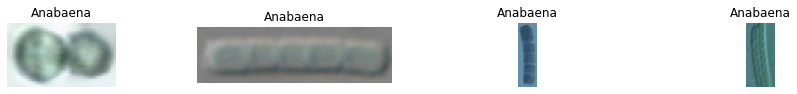

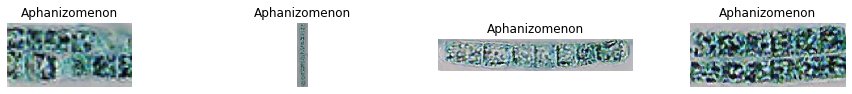

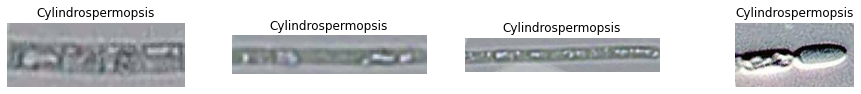

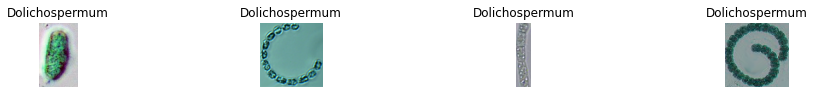

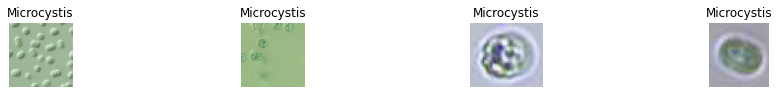

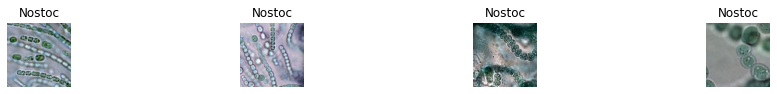

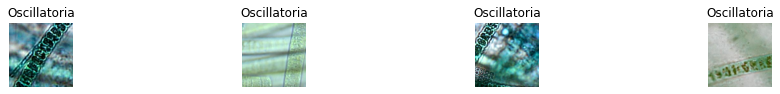

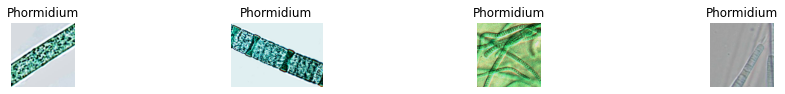

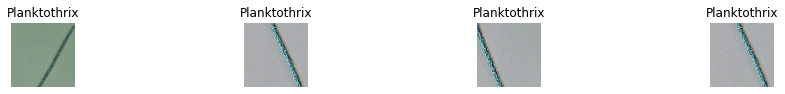

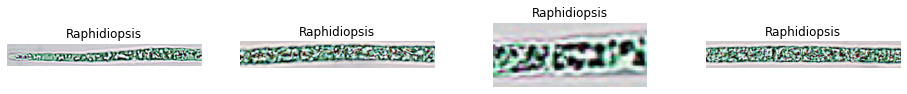

In [15]:
for cls in Categories:
  plt.figure(figsize=(16,4))
  for n , i in enumerate(list(np.random.randint(0,counter[cls],4))) : 
    plt.subplot(3,4,n+1)
    plt.imshow(images[cls][i],cmap="gray")   
    plt.axis('off')
    plt.title(cls)

#### Splitting Train and Test dataset

In [16]:
X_train_ind, X_test_ind, y_train, y_test = train_test_split(list(range(y.shape[0])), y, test_size=0.2,random_state=1)
X_train_addr = X_addr[X_train_ind]
X_train = X[X_train_ind]

X_test_addr = X_addr[X_test_ind]
X_test = X[X_test_ind]

In [17]:
collections.Counter(y_train)

Counter({'Oscillatoria': 157,
         'Microcystis': 896,
         'Dolichospermum': 130,
         'Phormidium': 224,
         'Aphanizomenon': 30,
         'Anabaena': 268,
         'Nostoc': 237,
         'Planktothrix': 104,
         'Cylindrospermopsis': 23,
         'Raphidiopsis': 5})

above numbers are the numbers that placed in ***training dataset***.

In [18]:
collections.Counter(y_test)

Counter({'Microcystis': 235,
         'Phormidium': 61,
         'Planktothrix': 19,
         'Oscillatoria': 32,
         'Anabaena': 57,
         'Nostoc': 73,
         'Cylindrospermopsis': 3,
         'Aphanizomenon': 4,
         'Dolichospermum': 33,
         'Raphidiopsis': 2})

above numbers are the numbers that placed in ***test dataset***.

-----------

#### Save splitted dataset to directory

In [214]:
for i , img in enumerate(X_train):
    try:
        os.mkdir(f'../dataset/Train/{y_train[i]}')
    except:
        pass
    address = f'../dataset/Train/{y_train[i]}/{X_train_addr[i][17:].split("/")[1]}'
    cv2.imwrite(address, np.array(new_X))

In [301]:
for i , img in enumerate(X_test):
    try:
        os.mkdir(f'../dataset/Test/{y_test[i]}')
    except:
        pass
    address = f'../dataset/Test/{y_test[i]}/{X_test_addr[i][17:].split("/")[1]}'
    cv2.imwrite(address, np.array(new_X))